# Homework 1

**Inhalt:** Datensets explorieren, filtern, Felder erstellen

**Nötige Skills:** Erste Schritte mit Pandas

**Lernziele:**
- Review und Übung

# Das Beispiel

Fussballstadien

Quelle/Beschreibung: http://opisthokonta.net/?cat=34

Laden Sie das File von hier herunter: http://opisthokonta.net/wp-content/uploads/2015/03/stadiums_20150302.csv

Speichern Sie das Datenfile an einem geeigneten Ort.

(zum Beispiel in einem Unterordner `dataprojects/stadiums`)

## Vorbereitung

Importieren Sie die benötigten Libraries und stellen Sie die richtigen Settings für Matplotlib ein.

In [6]:
import pandas as pd

In [1]:
#Matplotlib muss man in diesem Fall nicht importieren und mappen.

## Daten laden

Öffnen Sie das Datenfile in Pandas

In [8]:
path = "dataprojects/stadiums/stadiums_20150302.csv"

df = pd.read_csv(path)

In [10]:
df

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England
1,Aston Villa,Aston Villa,Birmingham,Villa Park,42785,52.509167,-1.884722,England
2,Blackburn Rovers,Blackburn,Blackburn,Ewood Park,31154,53.728611,-2.489167,England
3,Bolton Wanderers,Bolton,Bolton,Reebok Stadium,28100,53.580556,-2.535556,England
4,Chelsea,Chelsea,London,Stamford Bridge,42449,51.481667,-0.191111,England
...,...,...,...,...,...,...,...,...
159,Colchester United,Colchester,Colchester,Colchester Community Stadium,10105,51.923394,0.897703,England
160,Scunthorpe United,Scunthorpe,Scunthorpe,Glanford Park,9088,53.586725,-0.695266,England
161,A.F.C. Bournemouth,Bournemouth,Bournemouth,Goldsands Stadium,12000,50.735277,-1.838330,England
162,Yeovil Town,Yeovil,Yeovil,Huish Park,9565,50.950270,-2.674880,England


Untersuchen Sie die Struktur der Daten: Länge, Datenfelder, erste Zeilen

In [21]:
df

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England
1,Aston Villa,Aston Villa,Birmingham,Villa Park,42785,52.509167,-1.884722,England
2,Blackburn Rovers,Blackburn,Blackburn,Ewood Park,31154,53.728611,-2.489167,England
3,Bolton Wanderers,Bolton,Bolton,Reebok Stadium,28100,53.580556,-2.535556,England
4,Chelsea,Chelsea,London,Stamford Bridge,42449,51.481667,-0.191111,England
...,...,...,...,...,...,...,...,...
159,Colchester United,Colchester,Colchester,Colchester Community Stadium,10105,51.923394,0.897703,England
160,Scunthorpe United,Scunthorpe,Scunthorpe,Glanford Park,9088,53.586725,-0.695266,England
161,A.F.C. Bournemouth,Bournemouth,Bournemouth,Goldsands Stadium,12000,50.735277,-1.838330,England
162,Yeovil Town,Yeovil,Yeovil,Huish Park,9565,50.950270,-2.674880,England


Wie bekomme ich Hilfe für eine Funktion?

In [19]:
df.head? #dann popt unten ein Fensterbereich auf.

Sind die Daten vollständig?

In [64]:
df.shape

(164, 8)

In [65]:
df.columns

Index(['Team', 'FDCOUK', 'City', 'Stadium', 'Capacity', 'Latitude',
       'Longitude', 'Country'],
      dtype='object')

In [27]:
df.dtypes

Team          object
FDCOUK        object
City          object
Stadium       object
Capacity       int64
Latitude     float64
Longitude    float64
Country       object
dtype: object

In [28]:
df.describe()

,Capacity,Latitude,Longitude
count,164.000000,164.000000,164.000000
mean,29604.695122,49.938164,0.340175
std,17018.199640,5.070958,4.637269
min,6078.000000,36.734092,-8.739711
25%,17630.000000,47.938355,-2.753629
50%,25469.000000,51.490376,-1.212506
75%,36070.250000,53.444931,2.347292
max,99354.000000,57.595947,13.239444


## Einfache Auswertungen

Welche Länder sind in der Datenbank vertreten?

In [86]:
#Lösung:
df['Country'].unique()

array(['England', 'Scotland', 'Germany', 'Spain', 'France'], dtype=object)

In [35]:
df['Country'].value_counts()

England     72
France      26
Spain       25
Germany     23
Scotland    18
Name: Country, dtype: int64

In [38]:
df['Country'].count()

164

Wie viele Stadien sind pro Land in der Datenbank?

In [40]:
df['Country'].value_counts()

England     72
France      26
Spain       25
Germany     23
Scotland    18
Name: Country, dtype: int64

In welchen fünf Städten stehen am meisten Fussballstadien?

In [87]:
#Lösung:
df['City'].value_counts().head(5)

London         9
Madrid         3
Glasgow        3
Nottingham     2
Valencia       2
Name: City, dtype: int64

In [52]:
df['City'].value_counts().sort_values(ascending = False).head(5)

London        9
Madrid        3
Glasgow       3
Liverpool     2
Dundee        2
Name: City, dtype: int64

Wie viele Stadien stehen östlich von Greenwich (also dem Null-Meridian)?

In [88]:
len(df[df['Longitude'] > 0])

#meine Variante: 
#df[df.Longitude > 0].count()

52

## Ranglisten

Welche zehn Clubs haben die grössten Stadien?

In [90]:
df.sort_values('Capacity', ascending=False).head(10)

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country
88,Barcelona,Barcelona,Barcelona,Camp Nou,99354,41.380870,2.122802,Spain
99,Real Madrid,Real Madrid,Madrid,Santiago Bernabéu,85454,40.453060,-3.688350,Spain
65,Borussia Dortmund,Dortmund,Dortmund,Signal Iduna Park,80645,51.492569,7.451842,Germany
9,Manchester United,Man United,Stretford,Old Trafford,75811,53.463056,-2.291389,England
72,Hertha BSC,Hertha,Berlin,Olympiastadion,74244,52.514722,13.239444,Germany
64,Bayern Munich,Bayern Munich,Munich,Allianz Arena,71000,48.218775,11.624753,Germany
76,Schalke 04,Schalke 04,Gelsenkirchen,Veltins-Arena,61673,51.554503,7.067589,Germany
46,Celtic,Celtic,Glasgow,Celtic Park,60832,55.849711,-4.205589,Scotland
77,VfB Stuttgart,Stuttgart,Stuttgart,Mercedes-Benz Arena,60441,48.792269,9.232031,Germany
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England


In [ ]:
#meine Versuche:

#df.groupby('Capacity').value_counts().sort_values('Team', ascending=False)
#df.groupby['Team']['Capacity'].max().sort_values(ascending=False)
# df['Team'].value_counts()['Capacity']

Erstellen Sie eine neue Spalte ("Bezeichnung"), die den Teamnamen und das Stadion enthält (z.B. "Barcelona: Camp Nou")

Hint: Man kann Serien mit Text-Content genauso wie Serien mit Zahlen-Content addieren.

In [91]:
df['Name'] = df['Team'] + ": " + df['Stadium']
#df['Name'] = df['Team']['Stadium']

Speichern Sie die zehn Clubs mit den grössten Stadien in einem separaten Dataframe.

In [93]:
df_top10 = df.sort_values('Capacity', ascending=False).head(10)

Erstellen Sie einen horizontalen Barchart mit der Stadion-Bezeichnung und der Kapazität.

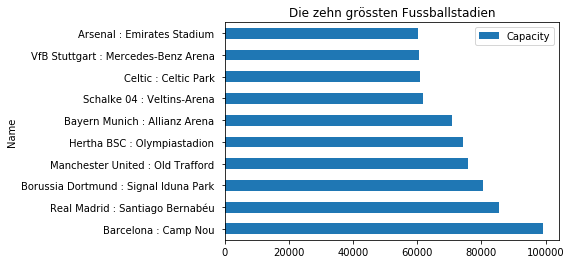

In [96]:
df_top10.plot(kind='barh', x='Name', y='Capacity', title='Die zehn grössten Fussballstadien')
#x und y werden getauscht. X sind Kategorien, y sind Balkengrössen.

## Gruppierte Auswertung

Ordnen Sie die Länder nach der Durchschnittsgrösse der Stadien.

In [97]:
df.groupby('Country')['Capacity'].mean().sort_values(ascending=False)

Country
Germany     45688.043478
Spain       37407.600000
France      27250.923077
England     25693.458333
Scotland    17261.222222
Name: Capacity, dtype: float64

Welches sind die grössten drei Stadien östlich des Null-Meridians?

In [98]:
df[df['Longitude'] > 0].sort_values('Capacity', ascending=False).head(3)

#

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country,Name
88,Barcelona,Barcelona,Barcelona,Camp Nou,99354,41.380870,2.122802,Spain,Barcelona : Camp Nou
65,Borussia Dortmund,Dortmund,Dortmund,Signal Iduna Park,80645,51.492569,7.451842,Germany,Borussia Dortmund : Signal Iduna Park
72,Hertha BSC,Hertha,Berlin,Olympiastadion,74244,52.514722,13.239444,Germany,Hertha BSC : Olympiastadion


Welches sind die grössten drei Stadien westlich des Null-Meridians?

Erstellen Sie ein Dataframe, das ausschliesslich die Stadien in London und Madrid enthält.

In [100]:
df[df['City']'London' & 'Madrid']
#df[df['Capacity'] > 80000]

SyntaxError: invalid syntax (<ipython-input-100-139f1a6284e8>, line 1)

Bei den Städten hat es zT Leerschläge drin. Führen Sie folgenden Code aus, um sie zu entfernen:

Erstellen Sie ein Dataframe, das nur die Stadien aus Madrid und Glasgow enthält.

Vergleichen Sie die Stadien der beiden Städe anhand des Medianwerts.

## Ein Histogramm

Wie ist die Verteilung der Stadiongrösse? Zeichnen Sie ein Histogramm mit genügend feiner Aufgliederung.

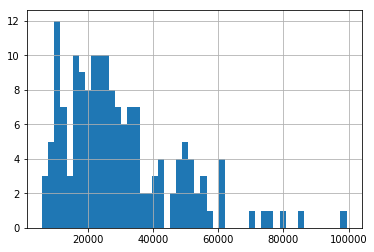

In [101]:
df['Capacity'].hist(bins=50)

## Ein hübscher Scatterplot

Man würde das normalerweise anders machen, aber da wir hier schon die Koordinaten haben...

- Definieren Sie einen Parameter "area" für die Punktegrösse, der sich an der Kapazität orientiert.

- Und plotten sie die Stadien auf einer "Landkarte" (Longitude auf der x-Achse, Latitude auf der y-Achse)